In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from src.data.make_dataset import *
from src.data.modal_data import *

In [34]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder = os.path.join(package_folder, 'data')
print(data_folder)

location = 'nw2'
turbine = 'c02'

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data


In [35]:
turbine_data = get_turbine_data(data_folder, location, turbine)
mpe_ss_data = get_mpe_data(turbine_data, 'SS', location, turbine)

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data\raw\nw2\nw2c02.parquet


In [36]:
from src.data.harmonics import *
harmonics_data = harmonics(turbine_data.filter(regex='rpm'), [1,3,6, 9])

In [37]:
from pytz import utc
mpe_ss2_data_plot = mpe_ss_data.copy().reset_index()
mpe_ss2_data_plot = mpe_ss2_data_plot[mpe_ss2_data_plot['mean_frequency'] < 1.2]
mpe_ss2_data_plot = mpe_ss2_data_plot[mpe_ss2_data_plot['mean_frequency'] > 0.9]

C:\Users\Max\AppData\Local\Temp\ipykernel_23996\1787896300.py:8: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



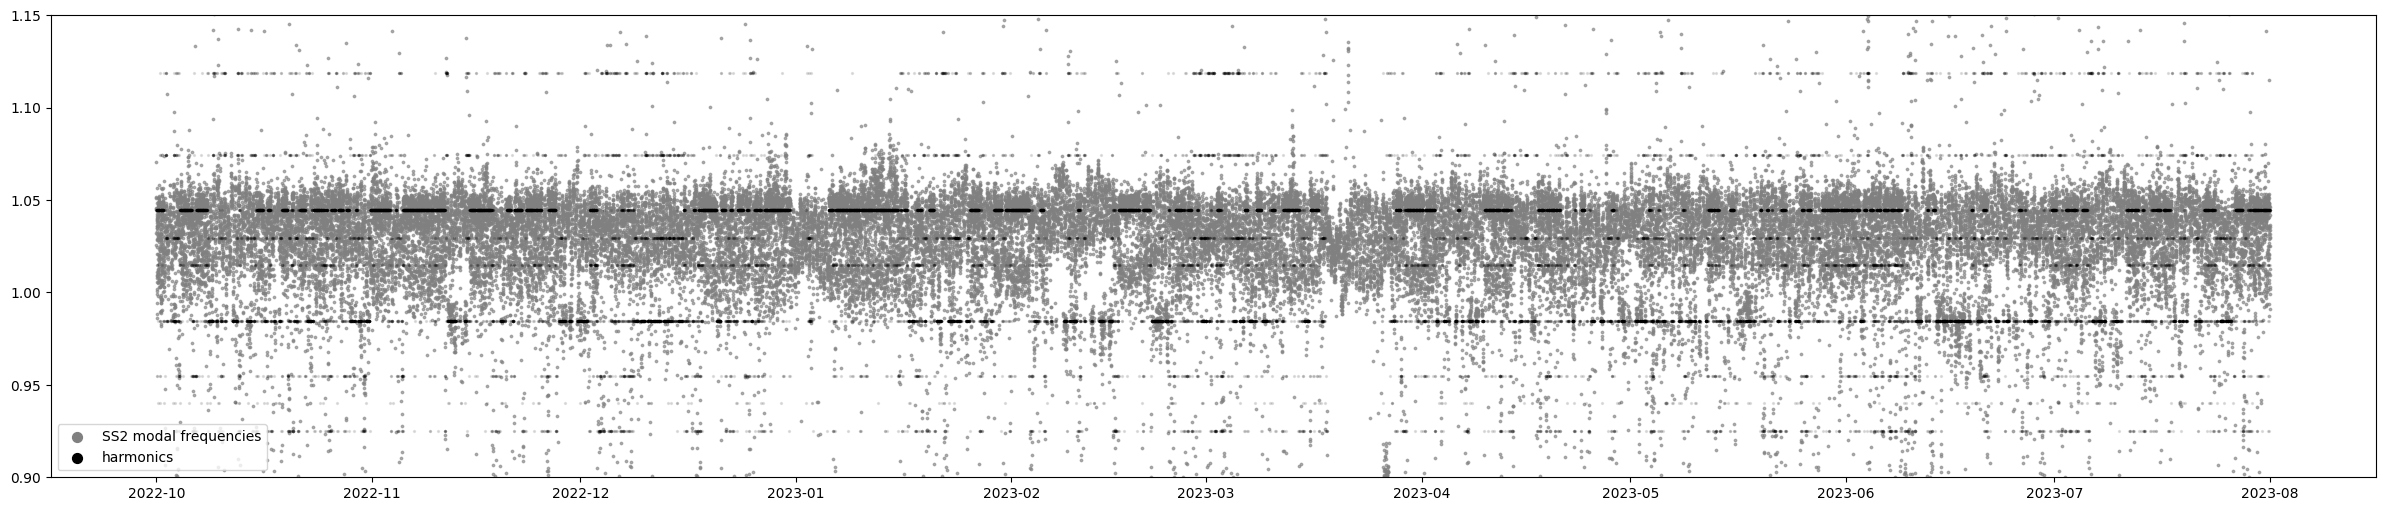

In [38]:
plt.figure(figsize=(30,6))

plt.scatter(mpe_ss2_data_plot['timestamp'], mpe_ss2_data_plot['mean_frequency'], s=3, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=2, alpha=0.1, color='k')
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()


In [39]:
import dash
from data_selector.dash_lasso_data_selector import *

# Create a Dash app instance
app = dash.Dash(__name__)

# Load your dataset
df = mpe_ss2_data_plot.drop(columns=['algorithm'])

# Create the app
dash_app = DashLassoDataSelector(df, app,fig_size=(1600, 600), marker_size=5)
dash_app.run()


In [66]:
dash_app.all_confirmed_data
selected_data_little = pd.concat([dash_app.all_confirmed_data[i] for i in list(dash_app.all_confirmed_data.keys())[:-1]]).set_index('timestamp')
selected_data_little.to_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_little.csv'))

In [67]:
dash_app.all_confirmed_data
selected_data_large = pd.concat([dash_app.all_confirmed_data[i] for i in list(dash_app.all_confirmed_data.keys())]).set_index('timestamp')
selected_data_large.to_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_large.csv'))

In [59]:
selected_data.to_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data4.csv'))

C:\Users\Max\AppData\Local\Temp\ipykernel_23996\2446333911.py:11: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



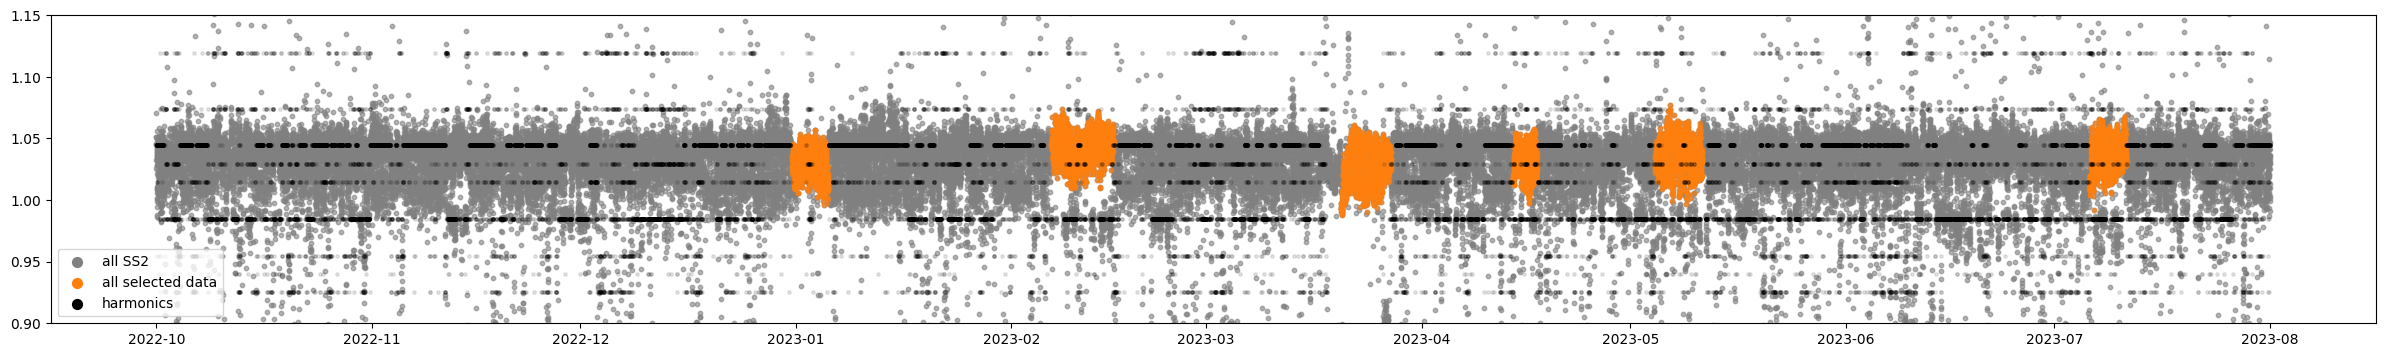

In [60]:
plt.figure(figsize=(30,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
#plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')
plt.scatter(selected_data.index, selected_data['mean_frequency'], s=10, alpha=0.6, color='tab:orange')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'all selected data', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()